In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import dataset_builder as db
ACT_LABELS = ["std", "sit", "dws", "ups", "wlk", "jog"]
TRIAL_CODES = {
    ACT_LABELS[0]:[6,14],
    ACT_LABELS[1]:[5,13],
    ACT_LABELS[2]:[1,2,11],
    ACT_LABELS[3]:[3,4,12],
    ACT_LABELS[4]:[7,8,15],
    ACT_LABELS[5]:[9,16],
}

In [3]:
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
## attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
sdt = ["rotationRate", "userAcceleration"]
print("[INFO] -- Selected sensor data types: "+str(sdt))    
act_labels = ACT_LABELS [0:6]
print("[INFO] -- Selected activites: "+str(act_labels))    
trial_codes = [TRIAL_CODES[act] for act in act_labels]
dt_list = db.set_data_types(sdt)
dataset = db.creat_time_series(dt_list, act_labels, trial_codes, mode="mag", labeled=True, combine_grav_acc=False)
dataset.head()

[INFO] -- Selected sensor data types: ['rotationRate', 'userAcceleration']
[INFO] -- Selected activites: ['std', 'sit', 'dws', 'ups', 'wlk', 'jog']
[INFO] -- Data subjects' information is imported.
[INFO] -- Creating Time-Series


,rotationRate,userAcceleration,act,id,weight,height,age,gender,trial
0,0.339322,0.066516,0.0,0.0,102.0,188.0,46.0,1.0,6.0
1,0.311639,0.085334,0.0,0.0,102.0,188.0,46.0,1.0,6.0
2,0.286441,0.102040,0.0,0.0,102.0,188.0,46.0,1.0,6.0
3,0.234742,0.118785,0.0,0.0,102.0,188.0,46.0,1.0,6.0
4,0.127439,0.119348,0.0,0.0,102.0,188.0,46.0,1.0,6.0


[INFO] -- Test Trials: [11, 12, 13, 14, 15, 16]
[INFO] -- Shape of Train Time-Series :(1081446, 9)
[INFO] -- Shape of Test Time-Series :(331419, 9)


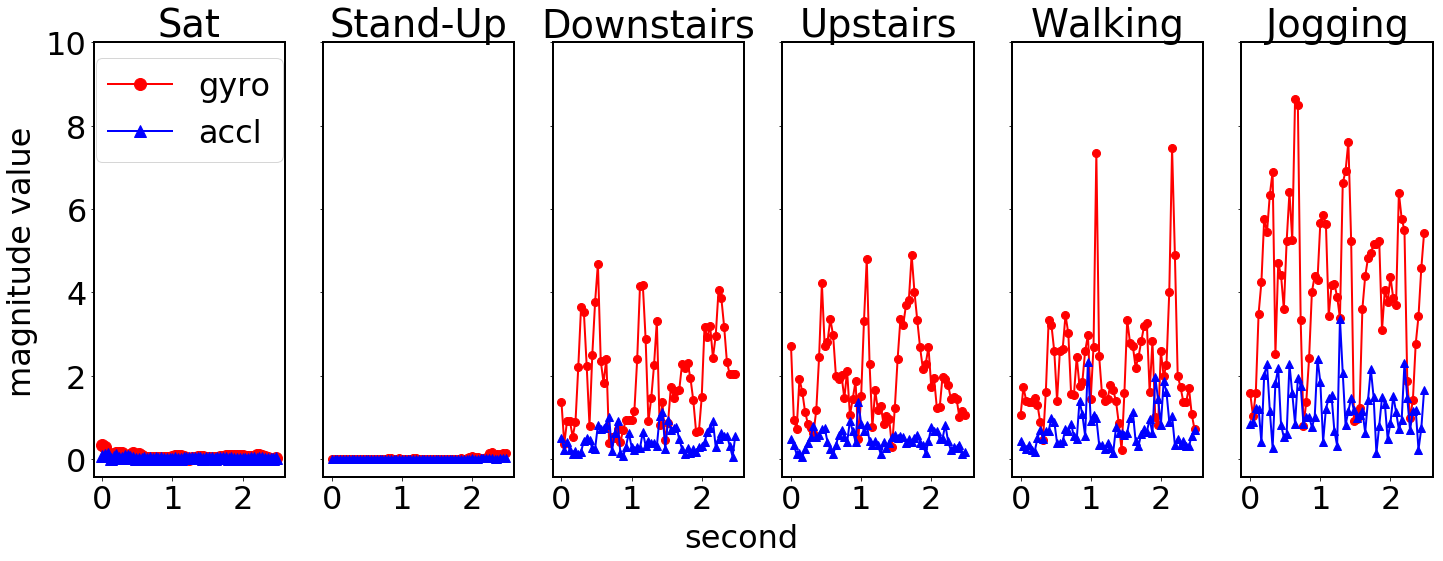

In [4]:
test_trail = [11,12,13,14,15,16]  
print("[INFO] -- Test Trials: "+str(test_trail))
test_ts = dataset.loc[(dataset['trial'].isin(test_trail))]
train_ts = dataset.loc[~(dataset['trial'].isin(test_trail))]

print("[INFO] -- Shape of Train Time-Series :"+str(train_ts.shape))
print("[INFO] -- Shape of Test Time-Series :"+str(test_ts.shape))

plt.rcParams['figure.figsize'] = (24,8)
plt.rcParams['font.size'] = 32
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
period = 2.5 # Seconds
sample_rate = 50 # Hz
points = int(period*sample_rate)
act_data = np.zeros((6,points))
clr1 = ["rs-","r*-","ro-","rv-","rp-","r^-"]
clr2 = ["bs-","b*-","bo-","bv-","bp-","b^-"]

act_lbl = ["Sat", "Stand-Up", "Downstairs", "Upstairs", "Walking", "Jogging"]
lbl = ["gyro", "accl"]

fig, ax = plt.subplots(1, 6, sharex='col', sharey='row')
for i in np.unique(train_ts["act"]):
    i =int(i)
    acc = np.zeros((2,points))
    rot = np.zeros((2,points))
    for j in [0]:
        data = train_ts[(train_ts["id"] == j) & (train_ts["act"] == i)]
        acc1 = data["userAcceleration"].values
        rot1 = data["rotationRate"].values
        acc1 = acc1[:points]
        rot1 = rot1[:points]
        acc[1,:] += acc1
        rot[1,:] += rot1
        acc[0,:] = np.arange(0.,125./50.,1./50)
        rot[0,:] = np.arange(0.,125./50.,1./50)
        if i!=0:
            ax[i].plot(rot[0,:][::2], rot[1,:][::2], "ro-", linewidth=2, markersize=8)
            ax[i].plot(acc[0,:][::2], acc[1,:][::2], "b^-", linewidth=2, markersize=8)
        else:
            ax[i].plot(rot[0,:][::2], rot[1,:][::2], "ro-", linewidth=2, markersize=12, label=lbl[0])
            ax[i].plot(acc[0,:][::2], acc[1,:][::2], "b^-", linewidth=2, markersize=12, label=lbl[1])
        
        ax[i].set_title(act_lbl[i])
plt.setp(ax, xticks=np.arange(0.,125./50.,1.), yticks=np.arange(0, 11, 2))
fig.text(0.5, 0.004, 'second', ha='center')
fig.text(0.075, 0.5, 'magnitude value', va='center', rotation='vertical', )
ax[0].legend(loc="upper center")